In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pandas as pd
import numpy as np



In [0]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']


In [0]:
train_path = tf.keras.utils.get_file(
    'iris_training.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'
)
test_path = tf.keras.utils.get_file(
    'iris_test.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv'
)
print(train_path)
print(test_path)
train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

/root/.keras/datasets/iris_training.csv
/root/.keras/datasets/iris_test.csv


In [0]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [0]:
numeric_cols = train.select_dtypes(np.number)
numeric_cols = list(numeric_cols.columns)
categorical_cols = train.select_dtypes('object')
categorical_cols = list(categorical_cols.columns)
print(numeric_cols)
print(categorical_cols)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
[]


In [0]:
train.describe(), test.describe()

(       SepalLength  SepalWidth  PetalLength  PetalWidth     Species
 count   120.000000  120.000000   120.000000  120.000000  120.000000
 mean      5.845000    3.065000     3.739167    1.196667    1.000000
 std       0.868578    0.427156     1.822100    0.782039    0.840168
 min       4.400000    2.000000     1.000000    0.100000    0.000000
 25%       5.075000    2.800000     1.500000    0.300000    0.000000
 50%       5.800000    3.000000     4.400000    1.300000    1.000000
 75%       6.425000    3.300000     5.100000    1.800000    2.000000
 max       7.900000    4.400000     6.900000    2.500000    2.000000,
        SepalLength  SepalWidth  PetalLength  PetalWidth    Species
 count    30.000000   30.000000    30.000000   30.000000  30.000000
 mean      5.836667    3.010000     3.836667    1.206667   1.000000
 std       0.653628    0.463383     1.537459    0.694775   0.742781
 min       4.300000    2.200000     1.100000    0.100000   0.000000
 25%       5.500000    2.725000     2.

In [0]:
train_y = train.pop('Species')
test_y = test.pop('Species')

In [0]:
train.shape, test.shape

((120, 4), (30, 4))

In [0]:
train['PetalLength'].mean(), train['PetalLength'].median()

(3.739166666666667, 4.4)

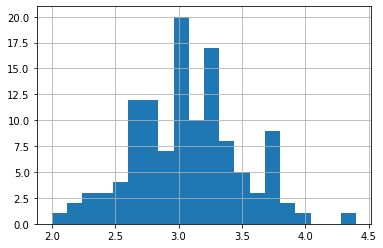

In [0]:
'''
EDA
for numerics you can have histograms.
'''
train['SepalWidth'].hist(bins=20)

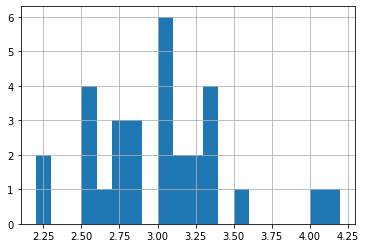

In [0]:
test['SepalWidth'].hist(bins=20)

In [0]:
def input_fn(features, labels, training=True, batch_size=64):
  # Create a tf dataset
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)

In [0]:
feature_columns = []
for key in train.keys():
  feature_columns.append(tf.feature_column.numeric_column(key=key))

print(feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [0]:
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                        hidden_units=[100, 50, 25],
                                        n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppg2bl3re', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=10000
)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppg2bl3re/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.5444796, step = 0
INFO

In [0]:
eval_results = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))
print(eval_results)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-29T22:03:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppg2bl3re/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.24480s
INFO:tensorflow:Finished evaluation at 2020-03-29-22:03:05
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.96666664, aver